## FASTQ format

The file is organized in 4 lines per read:
 1 - The header of the DNA sequence with the read id (the read length is optional)
 2 - The DNA sequence
 3 - The header of the sequence quality (this line could be either a repetition of line 1 or empty)
 4 - The sequence quality (it is not human readble, but is provided as PHRED score. Check   https://en.wikipedia.org/wiki/Phred_quality_score for more details)

In [11]:
for renz in ['HindIII', 'NcoI']:
    for rep in ['T0', 'T60']:
        print renz, rep
        ! dsrc d -s FASTQs/Hi-C_"$renz"_"$rep".fastq.dsrc | head -n 16000 | tail -n 4
        print ''

HindIII T0
@SRR1054341.4000 4000 length=108
TAGAGACTTTAATAATAACACTGTAAAAATGAACTGCAACTTTTCCCTAGGATCATGCCTGACTTTACCGCCTCCCAGGCACCACATGCAAAGAAAAGGAATGGATGA
+SRR1054341.4000 4000 length=108
BEE?AADEEEFAFFDFEFDFFFFFEFFFFF?FDF=DBEDDFFFEEFFDFB:5DDEABDCFFDBEEEFEF=E:EBABDB:EDBB=EAE5??AACA98><ACC=C:BC=:
--------------------------------------------------------------------------------------------------------------

HindIII T60
@SRR1054342.4000 4000 length=108
CTTCGTGCAACTTATTGCAATAGCACTCATTTGGAGGTGGGTAGGTGGGCATTTTACTAATTAGTTTCATCTTCATCAAATCAATTTTTCCACCTAGACTACATAGTC
+SRR1054342.4000 4000 length=108
FFFFFDGFG=GGGGGFFFAFFFFFFFDFFFFFFFFBFFFFEBEEE@E=EC??DDFFFDFEAFFDFFFFFFEFFFDFFBFFFEFDFEFFFF=FDF?=CDDBFBFFFFDF
--------------------------------------------------------------------------------------------------------------

NcoI T0
@SRR1054343.4000 HWI-ST227:189:D16FUACXX:6:1101:7795:2278 length=100
AATTGATATGATATTGTTGAATAACTCCATGCATGGGGCATTCACGGAAGCCACTTATACTCCTGGGCTACATATGCTGAGTGGGCTTCCGTGAATGCCC
+SRR105

Count the number of lines in the file (4 times the number of reads)

In [21]:
! dsrc d -s FASTQs/Hi-C_HindIII_T0.fastq.dsrc | wc -l

40000000


There are 40 M lines in the file, which means 10 M reads in total.

## Quality check before mapping

In [3]:
from pytadbit.utils.fastq_utils import quality_plot

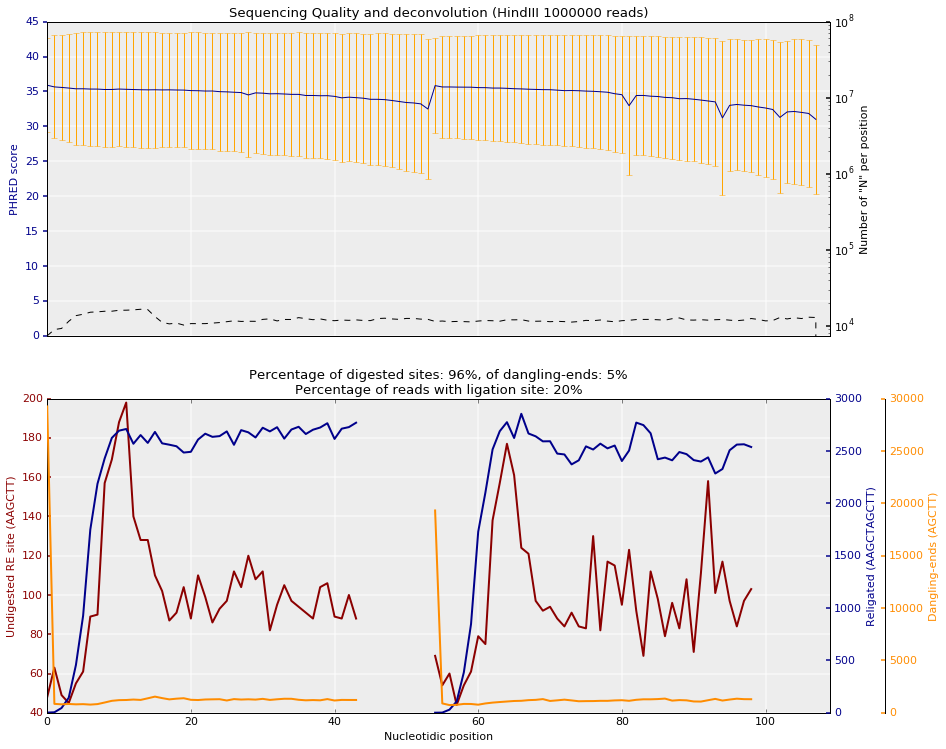

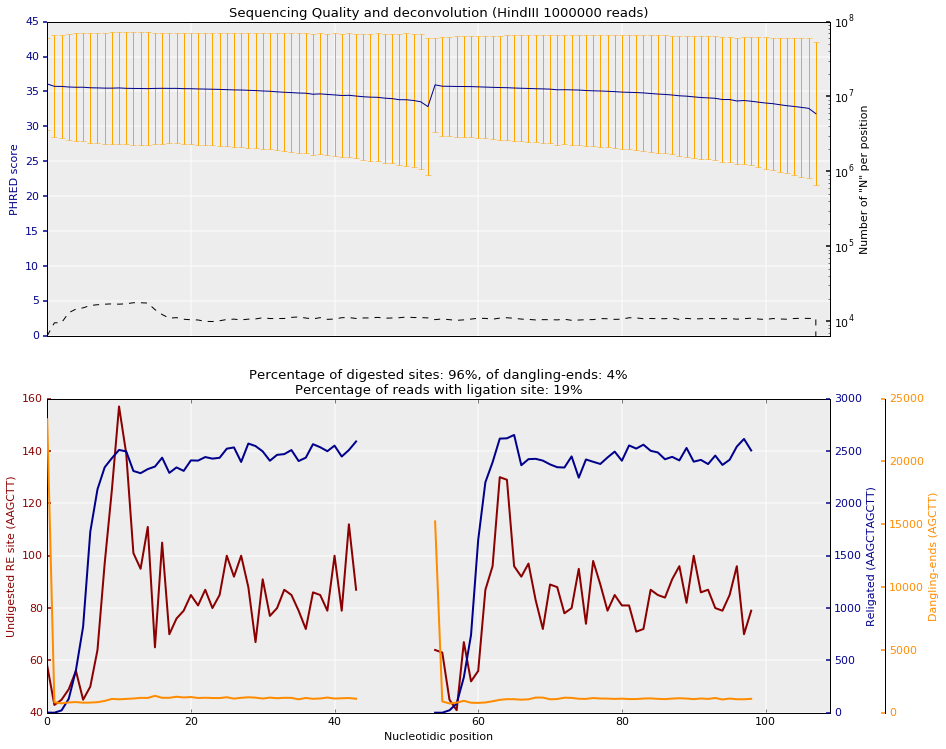

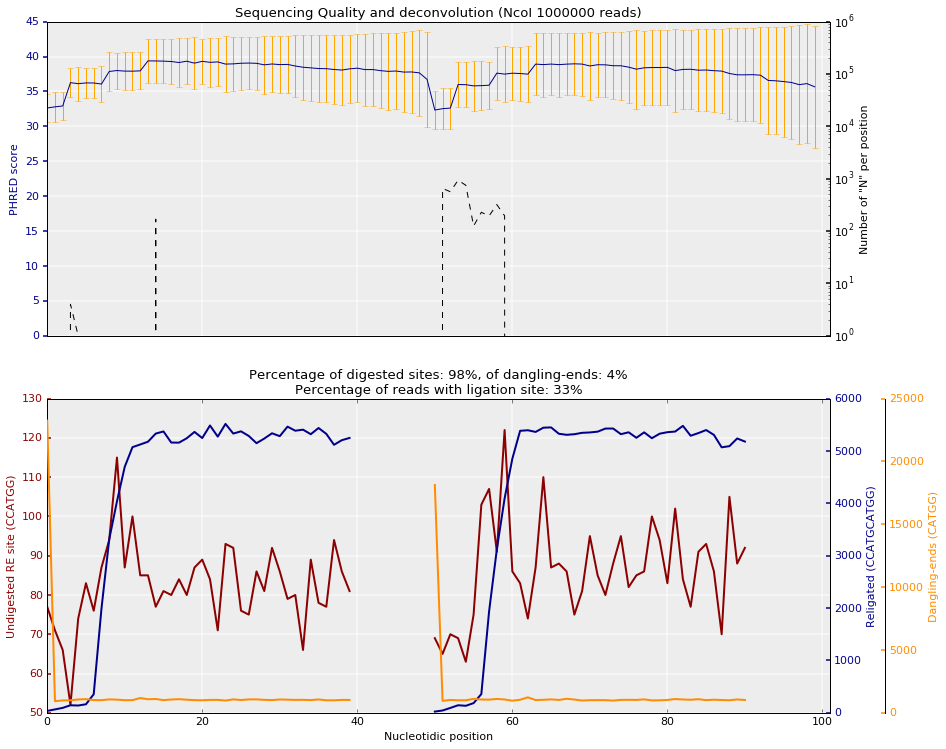

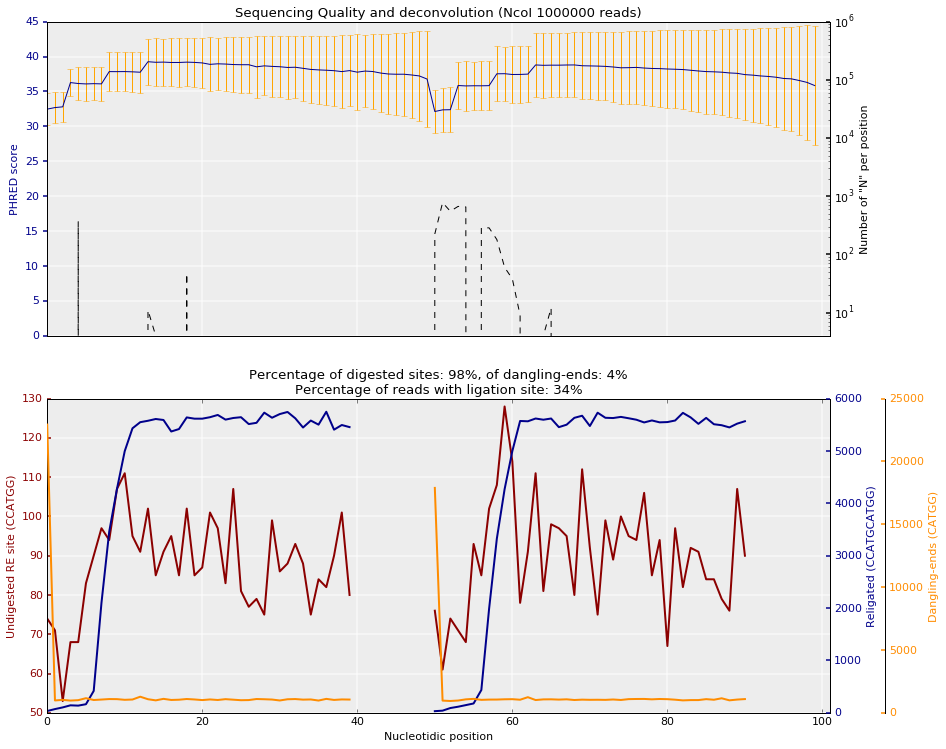

In [6]:
for r_enz in ['HindIII', 'NcoI']:
    for rep in ['T0', 'T60']:
        quality_plot('FASTQs/Hi-C_{0}_{1}.fastq.dsrc'.format(r_enz, rep), r_enz=r_enz, 
                     nreads=1000000, paired=True)

These plots provide a quick overview on the quality of the genome sequencing, as well as a rough estimate of the __efficiency of the digestion and ligation__ steps of the Hi-C experiment.